In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import sys
import os
import shutil
import gc
import numpy as np
import scipy.integrate as it
import subprocess as sub
import matplotlib.pyplot as plt
import linecache as l
import pandas as pd
from scipy import signal
from scipy.optimize import curve_fit
from scipy import fftpack

In [4]:
#irun = 2
pot = 1
prodrun=5000000
dt=1.0
A=1890

result="/home/arjun/Documents/TUTORIALS_LAMMPS/ionic_liquuid/binary_mixtures/IL_NEMD_DT/IL_models/EMIM/emim-bf4-tfsi_airebo/uncharged_system/NEMD_RESULTS"

In [5]:
def CalcCentreBins(lmin,lmax,slab):
    z=z=np.linspace(lmin,lmax,num=slab)
    lz=np.size(z)
    z_centre=np.zeros(lz-1)
    for i in range (lz-1):
        z_centre[i]=0.5*(z[i+1]+z[i])
    return z_centre

In [6]:
def cutXT(x_left, T_graL, x_mid, Tw, x_right, T_graR):
    n=np.size(x_left)
    #print(x_left)
    x_left=np.delete(x_left, [0,1,2,3,4,5,6,7,8], axis=0)
    #x_left=x_left[0:7]
    #x_left=x_left[6]
    #print(x_left)
    n=np.size(x_right)
    x_right=np.delete(x_right, [n-1,n-2,n-3,n-4,n-5,n-6,n-7,n-8,n-9], axis=0)
    #x_right=x_right[0]
    n=np.size(x_mid)
    x_mid=np.delete(x_mid,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    n=np.size(T_graL)
    T_graL=np.delete(T_graL, [0,1,2,3,4,5,6,7,8], axis=0)
    #T_graL=T_graL[0:7]
    #print(T_graL)
    #T_graL=T_graL[6]
    #print(T_graL)
    n=np.size(T_graR)
    T_graR=np.delete(T_graR, [n-1,n-2,n-3,n-4,n-5,n-6,n-7,n-8,n-9], axis=0)
    #T_graR=T_graR[0]
    #print(T_graL,T_graR)
    n=np.size(Tw)
    Tw=np.delete(Tw,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    #print(x_left, T_graL, x_mid, Tw, x_right, T_graR)
    return x_left, T_graL, x_mid, Tw, x_right, T_graR


In [7]:
def cutXT2(x_left, T_graL, x_mid, Tw, x_right, T_graR):
    n=np.size(x_left)
    #print(x_left)
    x_left=np.delete(x_left, [0,1,2], axis=0)
    x_left=x_left[0:7]
    n=np.size(x_right)
    x_right=np.delete(x_right, [n-1,n-2,n-3], axis=0)
    n=np.size(x_mid)
    x_mid=np.delete(x_mid,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    n=np.size(T_graL)
    T_graL=np.delete(T_graL, [0,1,2], axis=0)
    T_graL=T_graL[0:7]
    n=np.size(T_graR)
    T_graR=np.delete(T_graR, [n-1,n-2,n-3], axis=0)
    n=np.size(Tw)
    Tw=np.delete(Tw,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,n-51,n-50,n-49,n-48,n-47,n-46,n-45,n-44,n-43,n-42,n-41,n-40,n-39,n-38,n-37,n-36,n-35,n-34,n-33,n-32,n-31,n-30,n-29,n-28,n-27,n-26,n-25,n-24,n-23,n-22,n-21,n-20,n-19,n-18,n-17,n-16,n-15,n-14,n-13,n-12,n-11,n-10,n-9,n-8,n-7,n-6,n-5,n-4,n-3,n-2,n-1])
    #print(x_left, T_graL, x_mid, Tw, x_right, T_graR)
    return x_left, T_graL, x_mid, Tw, x_right, T_graR

In [8]:
def SmoothGrad(x_left, T_graL, x_mid, Tw, x_right, T_graR,x_leftfull,x_midfull,x_rightfull):
    
    pL=np.poly1d(np.polyfit(x_left,T_graL,1))
    pmid=np.poly1d(np.polyfit(x_mid,Tw,1))
    pR=np.poly1d(np.polyfit(x_right,T_graR,1))

    #x=np.concatenate([x_left,x_mid,x_right],axis=0)
    #p=np.concatenate([pL(x_left),pmid(x_mid),pR(x_right)],axis=0)
    L=np.column_stack((x_left,pL(x_left)))
    Lfull=np.column_stack((x_leftfull,pL(x_leftfull)))
    M=np.column_stack((x_mid,pmid(x_mid)))
    Mfull=np.column_stack((x_midfull,pmid(x_midfull)))
    R=np.column_stack((x_right,pR(x_right)))
    Rfull=np.column_stack((x_rightfull,pR(x_rightfull)))
    return L,M,R,Lfull,Mfull,Rfull

In [9]:
def calcThermal(x_left, T_graL, x_mid, Tw, x_right, T_graR,Q_flux):
    slope_TgraL, c_TgraL=np.polyfit(x_left,T_graL,1)
    slope_Tw, c_Tw=np.polyfit(x_mid,Tw,1)
    slope_TgraR, c_TgraR=np.polyfit(x_right,T_graR,1)
    
    k_graL=-(Q_flux/(slope_TgraL))    #W/mK
    k_W=-(Q_flux/(slope_Tw))
    k_graR=-(Q_flux/(slope_TgraR))

    x_intL=-wall
    x_intLw=-wall
    x_intR=wall
    x_intRw=wall

    Tint_lGra=slope_TgraL*x_intL+c_TgraL
    Tint_lWat=slope_Tw*x_intLw+c_Tw
    Tint_rWat=slope_Tw*x_intRw+c_Tw
    Tint_rGra=slope_TgraR*x_intR+c_TgraR
    delTL= Tint_lGra-Tint_lWat
    delTR=Tint_rWat-Tint_rGra
    G_L=((Tint_lGra-Tint_lWat))/Q_flux    #m2K/W
    G_R=((Tint_rWat-Tint_rGra))/Q_flux
    print("Temperature drop left  =",delTL,'K')
    print("Temperature drop right  =",delTR,'K')
    return k_graL,k_W,k_graR,G_L,G_R 

In [10]:
def avedata(file_name):
    VAL = np.loadtxt(file_name, dtype = float,skiprows=3,max_rows=1)
    maxrows = int(VAL[1])
    a = 4
    bindat = np.loadtxt(file_name, dtype = float,skiprows=a,max_rows=int(maxrows))[:,[0,1,2]]
    sum_dat =[]
    for i in range(5):
        VAL1 = np.loadtxt(file_name, dtype = float,skiprows=a,max_rows=int(maxrows))[:,3].reshape(maxrows,1)
        sum_dat.append(VAL1)
        a += maxrows+1
    #print(sum_dat)
    ave_dat = sum_dat[4]
    #print(ave_dat)
    bindat=np.append(bindat, ave_dat, axis=1)
    return bindat

100 350 1 100
20435.7570545626 13643.5901363088
-1.8031400630090687e-06
100 350 4 100
18345.0351006831 16035.4084038341
-1.81907108489509e-06
100 350 5 100
17564.8584660907 15700.7136797067
-1.7600831823173228e-06
[304.12  302.856 302.596 302.823 304.518 303.837 304.55 ] [387.811 390.459 390.396 389.09  391.112 393.79  393.377]
Temperature drop left  = -8.92931011520568 K
Temperature drop right  = -9.210906932674504 K
########## 350 1 #########################
Conductivity left  = 2.2103037790476323 W/mK
Conductivity right = 0.475000488153821 W/mK
Conductivity Fluid = 0.16237048259047576 W/mK
Conductivity Solid = 1.3426521336007267 W/mK
Kapitza left       = 7.302036741379293e-09 m2K/W
Kapitza length left       = 1.1856352295911408 nm
Kapitza right      = 7.53231548418063e-09 m2K/W
Kapitza length right      = 1.2230257001901221 nm
heatflux    = -1.794098110073827e-06 W/m^2
Kapitza Average    = 7.417176112779962 m2K/GW
Kapitza length Average    = 1.2043304648906314 nm
###################

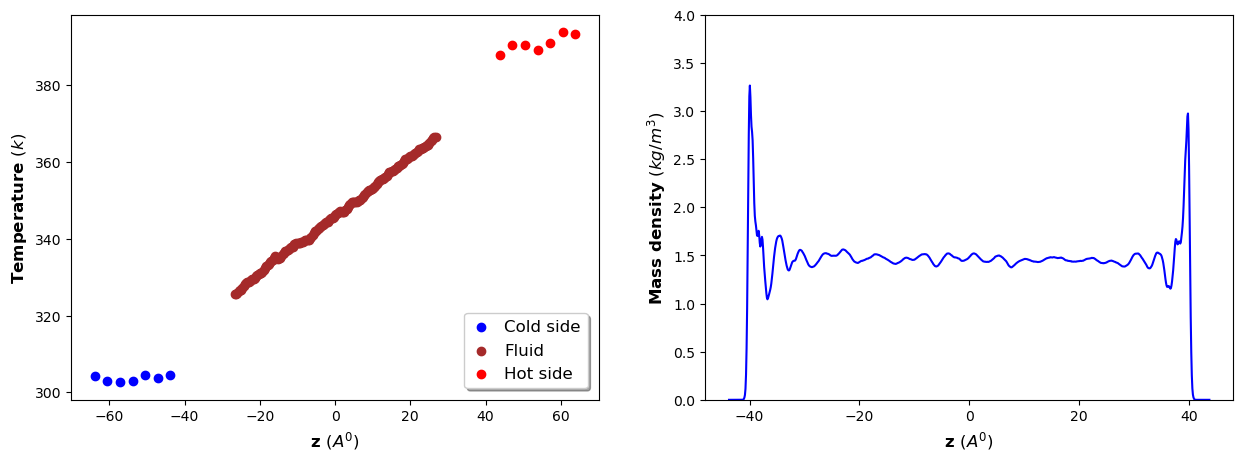

200 350 1 100
22707.9834380948 16055.552123519
-2.050980717545704e-06
200 350 4 100
20065.1057995868 17995.0131716851
-2.0137629085329047e-06
200 350 5 100
20107.3895661504 17727.015832819
-2.0018203914798624e-06
[303.469 304.083 304.265 304.589 304.951 305.1   306.884] [385.572 387.841 387.733 388.416 390.583 392.167 392.476]
Temperature drop left  = -9.587760065680584 K
Temperature drop right  = -8.319690894437827 K
########## 350 1 #########################
Conductivity left  = 1.0032237041424816 W/mK
Conductivity right = 0.40376219420771786 W/mK
Conductivity Fluid = 0.17821929429261232 W/mK
Conductivity Solid = 0.7034929491750997 W/mK
Kapitza left       = 6.893683639917676e-09 m2K/W
Kapitza length left       = 1.2285874333826554 nm
Kapitza right      = 5.981930775828911e-09 m2K/W
Kapitza length right      = 1.0660954813754875 nm
heatflux    = -2.022188005852824e-06 W/m^2
Kapitza Average    = 6.437807207873294 m2K/GW
Kapitza length Average    = 1.1473414573790714 nm
################

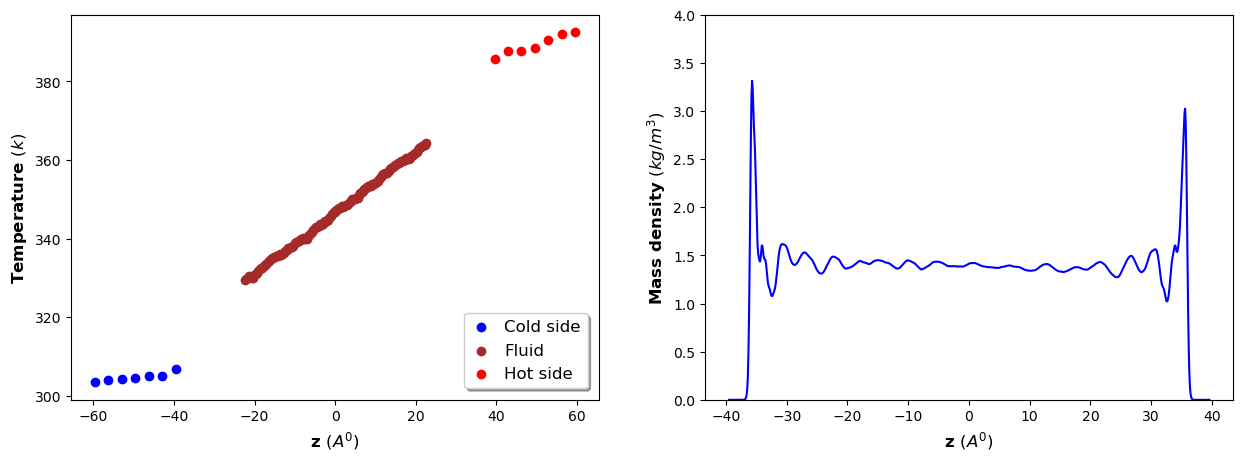

300 350 1 100
25839.4060373403 19177.6079617953
-2.381852592546857e-06
300 350 4 100
24006.922968142 21693.9142801759
-2.4180337168422166e-06
300 350 5 100
23282.1663168993 20760.3602245593
-2.330292409600984e-06
[304.69  304.807 305.388 306.229 306.72  307.579 307.932] [388.254 389.147 389.165 390.495 390.95  391.92  392.13 ]
Temperature drop left  = -10.222398438186246 K
Temperature drop right  = -13.198076014195635 K
########## 350 1 #########################
Conductivity left  = 0.9120007770949411 W/mK
Conductivity right = 0.7986200169487335 W/mK
Conductivity Fluid = 0.1983640743378761 W/mK
Conductivity Solid = 0.8553103970218373 W/mK
Kapitza left       = 6.313957942042499e-09 m2K/W
Kapitza length left       = 1.2524624225815415 nm
Kapitza right      = 8.151912427735178e-09 m2K/W
Kapitza length right      = 1.617046562811117 nm
heatflux    = -2.3767262396633526e-06 W/m^2
Kapitza Average    = 7.232935184888838 m2K/GW
Kapitza length Average    = 1.4347544926963294 nm
################

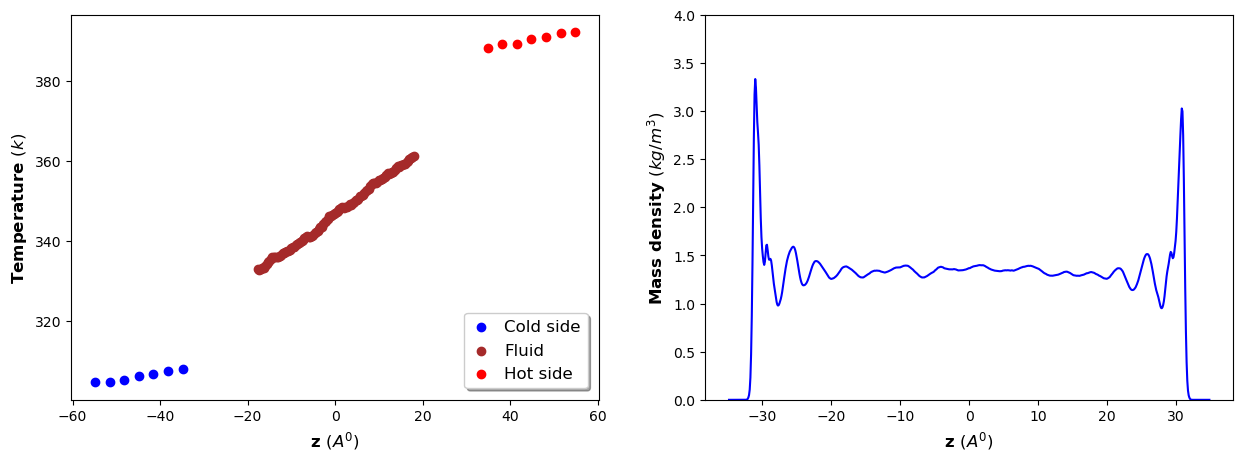

In [11]:
kb=1.987204e-3  #real units
kCal2Joule=4184
avaga=6.02214179e23
fs2s=1.0e-15
A2m =1.0e-10
K_real2SI=A2m*A2m*avaga*fs2s/(kCal2Joule)  #kapitza
K_real2SIcond=kCal2Joule/(avaga*fs2s*A2m)  #conductivity
diranl="/home/arjun/Documents/TUTORIALS_LAMMPS/ionic_liquuid/binary_mixtures/IL_NEMD_DT/IL_models/EMIM/emim-bf4-tfsi_airebo/uncharged_system/bf_"
conrange= [100,200,300]
trange= [350]
dtrange = [100]
iruns = [1,4,5]
kap=[]
denpeakL=[]
denpeakR=[]
denpeakLz=[]
denpeakRz=[]
Qnet=[]
cf=[]
bulkden=[]
kleft=[]
kright=[]
lk=[]
lkleft=[]
lkright=[]
    #print(Tfluid,Q)
for dT in dtrange:
    for con in conrange:
        Q=[]
        Tfluid=[]
        Tleft=[]
        Tright=[]
        den =[]
        for irun in iruns:
            T=350
            print(con,T,irun,dT)
            heat=np.loadtxt(diranl+str(con)+"/"+str(irun)+'/'+'heatflux.'+str(irun)+"."+str(T)+".dat")
            #heat=np.loadtxt(diranl+str(con)+str(irun)+'/heatfluxfull.'+str(irun)+"."+str(T)+".dat")
           # print(heat[4999][0],heat[3999][0])
            #print(heat[4999][1],heat[3999][1])
            Heat1=np.absolute(heat[0])
            Heat2=np.absolute(heat[1])          
            print(Heat1,Heat2)
            Q_fluxreal=-((Heat1+Heat2)*0.5)/(prodrun*dt*A)
            Q_flux=Q_fluxreal
            print(Q_flux)
            Q.append(Q_flux)
        
            datafluid=avedata(diranl+str(con)+'/'+str(irun)+'/'+'temp_fluid.'+str(irun)+"."+str(T)+".profile")
            tempfluid=datafluid[:,3]
            Tfluid.append(tempfluid)
            
            dataleft=avedata(diranl+str(con)+"/"+str(irun)+'/'+'temp_gnc_left.'+str(irun)+"."+str(T)+".profile")
            templeft=dataleft[:,3]
            Tleft.append(templeft)
            
            dataright=avedata(diranl+str(con)+"/"+str(irun)+'/'+'temp_gnc_right.'+str(irun)+"."+str(T)+".profile")
            tempright=dataright[:,3]
            wall = dataright[:,1][0]
            Tright.append(tempright)
        
            denfluid=avedata(diranl+str(con)+"/"+str(irun)+'/'+'dens_fluid.'+str(irun)+"."+str(T)+".profile")
#datafluid=np.loadtxt(diranl+'tmp_water.profile',skiprows=4)
            density=denfluid[:,3]
            den.append(density)   
#print(Tfluid)
        Qmean= sum(Q)/len(Q)
        tmeanfluid= np.mean(Tfluid, axis = 0)
        tmeanleft=np.mean(Tleft, axis = 0)
        tmeanright=np.mean(Tright, axis = 0)
        denavg = np.mean(den, axis = 0)
    #print(tmeanfluid,tmeanleft,tmeanright)

        zfluid=datafluid[:,1]
        zleft=dataleft[:,1]
        zright=dataright[:,1]
        zden = denfluid[:,1]
        zcord=np.concatenate([zleft,zfluid,zright],axis=0)
        temp=np.concatenate([templeft,tempfluid,tempright],axis=0)
        directory = result
        parent_dir = "bf="+str(con)+"_"+str(dT)+"K_airebo"
        path = os.path.join(directory , parent_dir)
        if os.path.exists(path):
            shutil.rmtree(path)
        os.mkdir(path)
        np.savetxt(path+'/tempGrad.'+"."+str(T)+".dat", np.column_stack((zcord,temp)))
        np.savetxt(path+'/tempGradleft.'+"."+str(T)+".dat", np.column_stack((zleft,templeft)))
        np.savetxt(path+'/tempGradfluid.'+"."+str(T)+".dat", np.column_stack((zfluid,tempfluid)))
        np.savetxt(path+'/tempGradright.'+"."+str(T)+".dat", np.column_stack((zright,tempright)))
        np.savetxt(path+'/dengrad.'+"."+str(T)+".dat", np.column_stack((zden,denavg)))    

###  Trimming edges
        zleft_trim,templeft,zfluid_trim,tempfluid,zright_trim,tempright=cutXT2(zleft,templeft,zfluid,tempfluid,zright,tempright)
        print(templeft,tempright)
###  Smoothening data
        zcord_trim=np.concatenate([zleft_trim,zfluid_trim,zright_trim],axis=0)
        temp_trim=np.concatenate([templeft,tempfluid,tempright],axis=0)
#zmidfull=np.linspace(fluid[0],fluid[1],num=fluid[2])
        left,mid,right,leftfull,midfull,rightfull=SmoothGrad(zleft_trim,templeft,zfluid_trim,tempfluid,zright_trim,tempright,zleft,zfluid,zright)
        np.savetxt(path+'/smoothGradleft.'+str(T)+"."+".dat", leftfull)
        np.savetxt(path+'/smoothGradright.'+str(T)+"."+".dat", rightfull)
        np.savetxt(path+'/smoothGradfluid.'+str(T)+"."+".dat", midfull)

###  Kapitza and conductivity
        C_left,C_fluid,C_right,K_left,K_right=calcThermal(zleft_trim,templeft,zfluid_trim,tempfluid,zright_trim,tempright,Q_flux)
        C_left=C_left*K_real2SIcond
        C_right=C_right*K_real2SIcond
        C_fluid=C_fluid*K_real2SIcond
        K_left=K_left*K_real2SI
        K_right=K_right*K_real2SI
        C_solid=0.5*(C_left+C_right)
        K=0.5*1000000000*(K_left+K_right)
        l_kleft = C_fluid *K_left*1000000000
        l_kright = C_fluid * K_right*1000000000
        l_k = 0.5*(l_kleft+l_kright)
        np.savetxt(path+'/thermalCond.'+"."+str(T)+".dat",np.vstack((C_left,C_fluid,C_right,C_fluid,C_solid)))  
        np.savetxt(path+'/boundaryCond.'+"."+str(T)+".dat", np.vstack((K_left,K_right,K))) 
        print("##########",T,pot,"#########################")
        print("Conductivity left  =",C_left,'W/mK')
        print("Conductivity right =",C_right,'W/mK')
        print("Conductivity Fluid =",C_fluid,'W/mK')
        print("Conductivity Solid =",C_solid,'W/mK')
        print("Kapitza left       =",K_left,'m2K/W')
        print("Kapitza length left       =",l_kleft,'nm')
        print("Kapitza right      =",K_right,'m2K/W')
        print("Kapitza length right      =",l_kright,'nm')
        print("heatflux    =",Qmean,'W/m^2')
        print("Kapitza Average    =",K,'m2K/GW')
        print("Kapitza length Average    =",l_k,'nm')
        kap.append(K)
        kleft.append(K_left)
        kright.append(K_right)
        lk.append(l_k)
        lkleft.append(l_kleft)
        lkright.append(l_kright)
        print("###################################")
        data = pd.read_csv(path+'/dengrad.'+"."+str(T)+".dat",sep='\s+',header=None)
        data = pd.DataFrame(data)
        x = data[0]
        y = data[1]
        bins= int(np.size(y)/5)
        dmaxL=max(y[:bins])
        dmaxR=max(y[-bins:])
        yleft=y[:bins]
        yright=y[-bins:]
        dmaxLz=x[yleft.argmax()]
        dmaxRz=x[bins-int(yright.argmax())]        
        print(dmaxL,dmaxLz,dmaxR,dmaxRz)
        Qnet.append(Qmean)
        denpeakL.append(dmaxL)
        denpeakR.append(dmaxR)
        denpeakLz.append(dmaxLz)
        denpeakRz.append(dmaxRz)
        cf.append(C_fluid)
        z=y[bins:]
        zz=z[:-bins]
        zzz=np.mean(zz)
        bulkden.append(zzz)
     #   plt_1 = plt.figure(figsize=(10, 10))
        figure, axis = plt.subplots(1, 2)
        figure.set_size_inches(15, 5)
        axis[0].scatter(zleft_trim, templeft,color='b',label = 'Cold side')
        axis[0].scatter(zfluid_trim, tempfluid,color='brown',label = 'Fluid')
        axis[0].scatter(zright_trim, tempright,color='r',label = 'Hot side')
        #axis[0].set_title("Temperature profile@"+str(T))
        axis[1].plot(x, y,'b')
        #axis[1].set_title("Density Gradient_"+str(dmaxL))
        axis[0].legend(loc = 'lower right', shadow = True, 
            handlelength = 1.2, fontsize = 'large', borderaxespad = 0.7,ncol=1,frameon=True)
        axis[0].set_xlabel("z $(A^0)$",fontweight = 'bold',fontsize=12)
        axis[1].set_xlabel("z $(A^0)$",fontweight = 'bold',fontsize=12)
        axis[1].set_ylim(0,4)
        axis[0].set_ylabel("Temperature $(k)$",fontweight = 'bold',fontsize=12)
        axis[1].set_ylabel("Mass density $(kg/m^3)$",fontweight = 'bold',fontsize=12)
        extent = axis[0].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        plt.savefig(diranl+str(con)+'/'+'temp_pr'+str(dT)+'.'+str(con)+'.png',dpi=600, bbox_inches=extent.expanded(1.25, 1.3))
        extent = axis[1].get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        plt.savefig(diranl+str(con)+'/'+'dens_pro'+str(dT)+'.'+str(con)+'.png',dpi=600, bbox_inches=extent.expanded(1.25, 1.3))        
        plt.savefig(diranl+str(con)+'/'+"fig"+str(dT)+'.'+str(con)+'.png')
        plt.show()
        plt.close()
np.savetxt('data_uncharged'+".dat", np.column_stack((kap,kleft,kright,denpeakL,denpeakLz,denpeakR,denpeakRz,bulkden,Qnet)),header='Kapitza k_left k_right peak_denL peak_denLz peak_denR peak_denRz bulk_den Qtotal')


100 EIM
[4.81925537e-01 4.86502053e-01 4.69931480e-01 4.43446774e-01
 4.16795740e-01 4.24047066e-01 4.43046849e-01 4.66387439e-01
 4.66579503e-01 4.60915990e-01 4.41480016e-01 4.29172250e-01
 4.12379679e-01 4.13647501e-01 4.37982141e-01 4.70559087e-01
 5.22177186e-01 5.55711824e-01 5.82486797e-01 5.88354166e-01
 5.78458416e-01 5.40196602e-01 4.89175065e-01 4.48984956e-01
 4.13033172e-01 4.08204002e-01 4.22714436e-01 4.58217903e-01
 4.56663824e-01 4.41966953e-01 4.41605293e-01 4.46012192e-01
 4.69518489e-01 4.98229634e-01 5.10728168e-01 5.08943357e-01
 4.95335738e-01 4.86855136e-01 4.73930627e-01 4.48125132e-01
 4.08793115e-01 3.82999633e-01 3.84700275e-01 4.13138682e-01
 4.40264048e-01 4.50230006e-01 4.40539990e-01 4.27691999e-01
 4.28183370e-01 4.59497135e-01 5.13701972e-01 5.76599806e-01
 6.08450741e-01 6.19654858e-01 5.82226671e-01 5.07687763e-01
 4.41338643e-01 4.03292677e-01 3.90603328e-01 3.88702574e-01
 3.87666581e-01 3.78434581e-01 3.79416638e-01 4.11508903e-01
 4.50815244e-01 

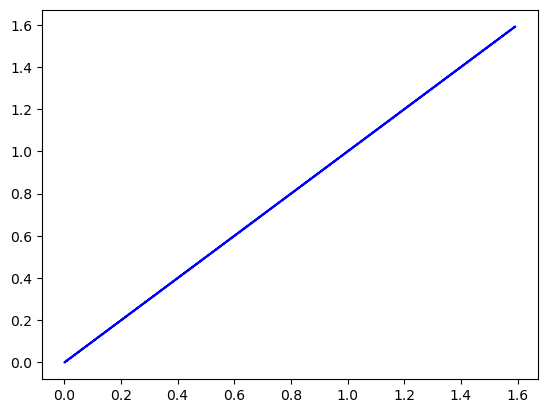

100 BF
[0.04289719 0.0369076  0.03357426 0.03938972 0.04074945 0.04565454
 0.04911598 0.04921839 0.05356525 0.05601594 0.05878605 0.06458654
 0.07638013 0.09734249 0.11284817 0.13992339 0.15567067 0.15728567
 0.15303587 0.14529098 0.12772998 0.12059749 0.11713754 0.12361549
 0.13056221 0.14159533 0.13041598 0.10794843 0.07749642 0.05250533
 0.03408943 0.02385687 0.02441178 0.03499277 0.04829027 0.05850286
 0.06017739 0.05746458 0.04602646 0.03942891 0.0370638  0.04714312
 0.06507805 0.08855728 0.1111289  0.1238201  0.11517002 0.10677595
 0.10291894 0.10620219 0.11164148 0.10680848 0.10997749 0.12301418
 0.13473346 0.13169458 0.13261732 0.13158385 0.12473936 0.11118788
 0.10442489 0.10543267 0.10887247 0.11578316 0.11008582 0.10359123
 0.10752957 0.10569034 0.09645762 0.08461763 0.06816536 0.04717676
 0.02459922 0.02625433 0.06759049 0.16912439 0.17936302 0.16631872
 0.18986266 0.19184557 0.07384017 0.00076952 0.         0.
 0.         0.         0.         0.         0.         0.
 0. 

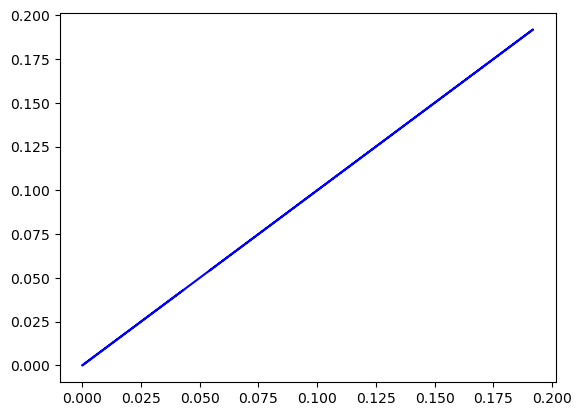

100 NSC
[0.9369507  0.97455757 0.96790586 0.97685214 0.97116639 1.023962
 1.0387811  1.0318203  1.02519646 1.01865102 0.99834321 0.97742526
 0.93033774 0.89902912 0.82627558 0.74203606 0.70937225 0.71954734
 0.7234358  0.73218292 0.75732294 0.80498862 0.83625476 0.81853556
 0.84194146 0.86469496 0.92685947 0.96695341 0.95485136 0.95942617
 0.95686357 0.97257988 0.99312524 1.01660638 1.03431426 1.00841365
 0.97950521 0.93834216 0.93533635 0.91318316 0.85085566 0.85383904
 0.90414434 0.95656616 1.01407349 1.0388682  1.0044067  0.92876061
 0.84599186 0.79349813 0.74742197 0.68150585 0.65219544 0.65821755
 0.66923768 0.69063047 0.75220706 0.83094534 0.94181898 1.06008555
 1.12036215 1.08302526 0.9993388  0.9107724  0.7645421  0.64739272
 0.61783745 0.64864263 0.67256748 0.70899313 0.79343227 0.84740216
 0.95807989 1.02672814 1.27575854 1.28869714 1.16054284 1.18662251
 1.29660085 1.18971753 0.55456944 0.01123636 0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

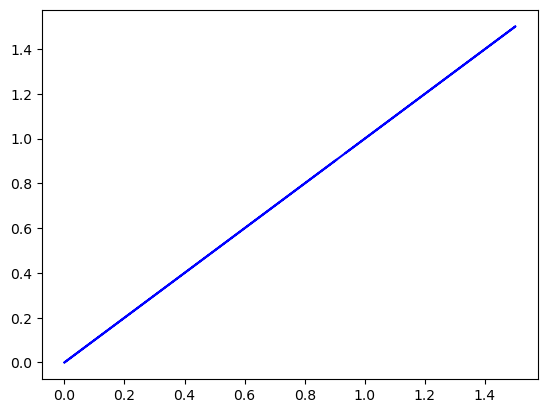

200 EIM
[5.97014913e-01 5.66193502e-01 5.14665944e-01 4.83477902e-01
 4.77536466e-01 4.92566674e-01 4.86914931e-01 4.87565882e-01
 4.86258405e-01 5.05587951e-01 5.27827128e-01 5.50731560e-01
 5.38059647e-01 5.21129215e-01 5.05265716e-01 5.00425689e-01
 5.17173910e-01 5.48552799e-01 5.79652211e-01 5.95029685e-01
 5.77104513e-01 5.57703609e-01 5.47750593e-01 5.45418471e-01
 5.42520497e-01 5.54315897e-01 5.77997397e-01 5.77294630e-01
 5.62703380e-01 5.54582519e-01 5.52417718e-01 5.58998966e-01
 5.76196466e-01 6.17456264e-01 6.28229355e-01 6.02843236e-01
 5.55484880e-01 4.97468084e-01 4.62695737e-01 4.51893029e-01
 4.63188845e-01 4.61600743e-01 4.77332147e-01 4.98274685e-01
 5.26273278e-01 5.69193508e-01 5.85047205e-01 5.75392586e-01
 5.41452981e-01 5.21709305e-01 5.24924685e-01 5.28168006e-01
 5.30588799e-01 5.15993744e-01 4.73536522e-01 4.36014448e-01
 4.41030412e-01 4.88481998e-01 5.45055167e-01 5.91306056e-01
 6.36384142e-01 6.01055425e-01 4.87210078e-01 3.98719554e-01
 3.02802130e-01 

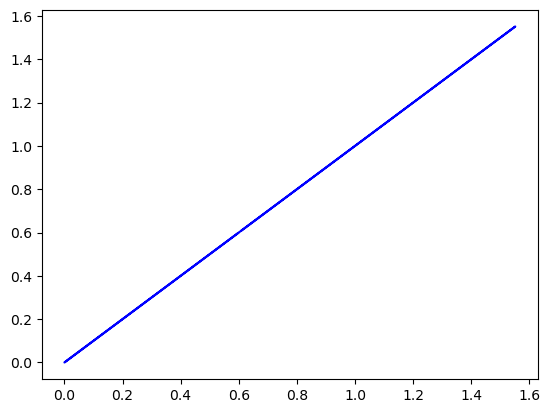

200 BF
[1.98629847e-01 1.79802906e-01 1.68724812e-01 1.86540106e-01
 2.16018391e-01 2.42036815e-01 2.64656339e-01 2.49427626e-01
 2.19178044e-01 1.75139261e-01 1.45296474e-01 1.32896173e-01
 1.50663990e-01 1.86524216e-01 2.21038954e-01 2.38419731e-01
 2.53762991e-01 2.48044468e-01 2.47053696e-01 2.41847645e-01
 2.42334994e-01 2.57092608e-01 2.65745957e-01 2.70143214e-01
 2.76837001e-01 3.03574626e-01 3.37559156e-01 3.63160988e-01
 3.81016185e-01 3.83174725e-01 3.65505754e-01 3.31685634e-01
 3.02298039e-01 2.62892423e-01 2.23055617e-01 1.85304547e-01
 1.58494124e-01 1.47073879e-01 1.55676424e-01 1.67232453e-01
 1.80692809e-01 1.92254931e-01 1.98908992e-01 2.00865604e-01
 2.02207023e-01 2.02702872e-01 1.96579945e-01 1.93868847e-01
 2.01097461e-01 2.08861644e-01 2.30452521e-01 2.56793697e-01
 2.62142556e-01 2.46923629e-01 2.23085158e-01 1.85967578e-01
 1.45340441e-01 1.09757702e-01 9.17997842e-02 9.94008342e-02
 1.02873249e-01 9.65568875e-02 9.52941771e-02 7.67000184e-02
 4.87700591e-02 4

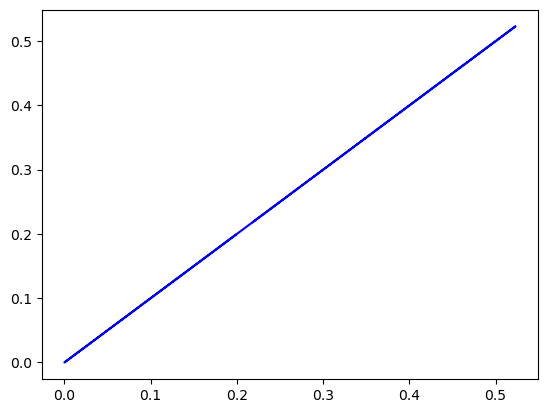

200 NSC
[6.48676411e-01 6.32560111e-01 6.29628006e-01 6.19581435e-01
 6.51447903e-01 6.95485528e-01 7.21364995e-01 7.34637733e-01
 7.47704335e-01 7.65990715e-01 7.32412969e-01 7.14654057e-01
 6.69562280e-01 6.16611951e-01 5.67854698e-01 5.38924323e-01
 5.46833095e-01 5.65351486e-01 5.76122791e-01 5.89069417e-01
 5.92140874e-01 5.86991949e-01 5.81876782e-01 5.43696234e-01
 5.01717054e-01 4.61167332e-01 4.17528955e-01 3.72684850e-01
 3.52100812e-01 3.47620702e-01 3.49811839e-01 3.75978512e-01
 4.21320933e-01 4.95691386e-01 5.66440482e-01 6.49632470e-01
 7.09352216e-01 7.46185536e-01 7.43922348e-01 7.39108760e-01
 7.40246785e-01 7.68081343e-01 7.73563803e-01 7.31488904e-01
 6.88890746e-01 6.55535666e-01 6.08926876e-01 5.51741001e-01
 4.95966670e-01 4.97297934e-01 5.47249131e-01 6.00064481e-01
 6.54240564e-01 6.88732157e-01 7.28114963e-01 7.57466760e-01
 7.57120638e-01 7.76872066e-01 8.32967231e-01 8.87281060e-01
 8.70378239e-01 8.78360112e-01 8.08364750e-01 7.05736524e-01
 7.03391331e-01 

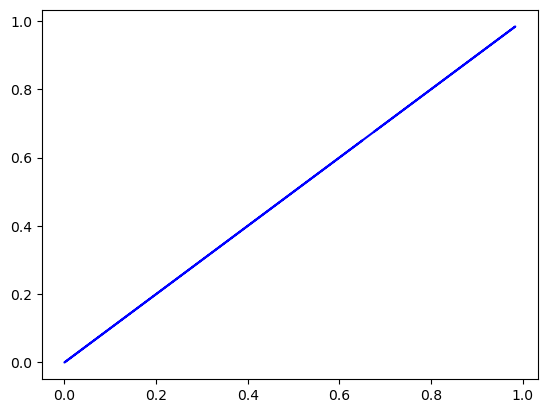

300 EIM
[6.28063809e-01 6.43405836e-01 6.34087660e-01 6.04133326e-01
 5.65669329e-01 5.32698251e-01 5.03006954e-01 5.06828222e-01
 5.58304367e-01 6.13536946e-01 6.16402510e-01 5.89134992e-01
 5.60303508e-01 5.50162282e-01 5.47561619e-01 5.78317708e-01
 6.12081575e-01 6.13797144e-01 6.07439025e-01 5.94907814e-01
 5.96551386e-01 5.81045254e-01 6.00256874e-01 6.16842875e-01
 6.23862094e-01 6.25070630e-01 6.31173706e-01 6.60374803e-01
 6.81039243e-01 6.60429928e-01 6.10117680e-01 5.89073926e-01
 5.80721128e-01 5.90538389e-01 6.11135855e-01 6.47222829e-01
 6.67817595e-01 6.82030408e-01 6.79989264e-01 6.56674451e-01
 6.71880546e-01 6.96484166e-01 7.12250649e-01 6.77052543e-01
 6.08913217e-01 5.36244430e-01 4.79249400e-01 4.81411581e-01
 5.56579370e-01 6.63979732e-01 7.96778265e-01 8.93365480e-01
 8.25904047e-01 6.27917709e-01 4.80783209e-01 3.61146272e-01
 3.04709756e-01 3.51893257e-01 4.32605725e-01 5.34710852e-01
 9.10491997e-01 1.71978399e+00 6.54840621e-01 5.14778072e-02
 1.51502275e-03 

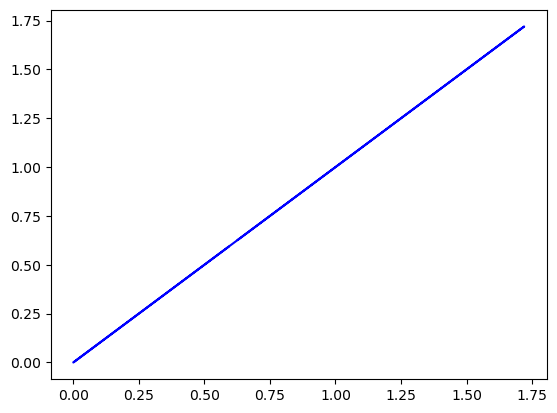

300 BF
[0.21286664 0.24990312 0.27071236 0.27304739 0.27043023 0.25285584
 0.25237683 0.27804742 0.32450945 0.35219472 0.37631593 0.35074341
 0.30112216 0.28402994 0.27585125 0.28593061 0.2980141  0.30886558
 0.32651265 0.352516   0.37447403 0.4013911  0.42689726 0.44555351
 0.42373489 0.37808334 0.35778556 0.34745851 0.37206022 0.39004689
 0.40064086 0.40690721 0.40192018 0.41270343 0.43191212 0.46411988
 0.49022925 0.49139213 0.48521145 0.44655735 0.40110284 0.39449319
 0.41092287 0.43845633 0.45882678 0.4781276  0.47356858 0.4364129
 0.39257694 0.3715397  0.37406954 0.37159973 0.35292676 0.33644776
 0.2732986  0.17232634 0.12318262 0.32862044 0.48250664 0.36226866
 0.52604618 0.65029174 0.4383259  0.02308476 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

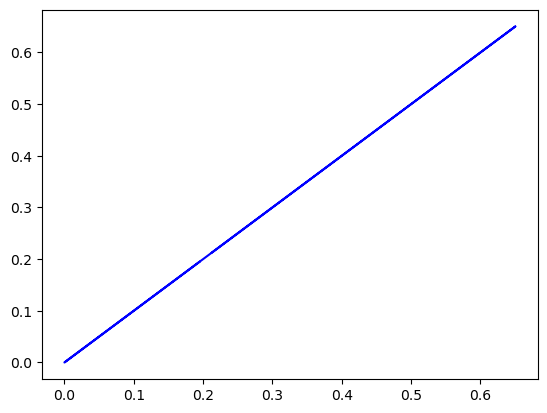

300 NSC
[5.35894053e-01 5.71857578e-01 5.82434458e-01 5.80614084e-01
 5.70378968e-01 5.54663417e-01 5.37579118e-01 5.30703762e-01
 5.36137531e-01 5.10384436e-01 4.81041663e-01 4.44897099e-01
 4.09388135e-01 4.17285679e-01 4.34006688e-01 4.29366828e-01
 4.32035263e-01 4.44506006e-01 4.21177121e-01 3.76057618e-01
 3.53179025e-01 3.45990995e-01 3.34065215e-01 3.11506591e-01
 3.09788133e-01 3.12233481e-01 3.06151917e-01 2.93647743e-01
 2.81275499e-01 2.68838466e-01 2.68180067e-01 2.69057402e-01
 2.56121192e-01 2.44271397e-01 2.21334920e-01 1.98860935e-01
 1.82224733e-01 1.74857594e-01 1.72355619e-01 1.67796263e-01
 1.82603174e-01 1.99742239e-01 2.18946288e-01 2.27338528e-01
 2.20814944e-01 2.18435648e-01 2.28515720e-01 2.38060223e-01
 2.26296732e-01 2.31032526e-01 2.50398035e-01 2.88009170e-01
 3.14040746e-01 2.94277073e-01 3.34456886e-01 4.95493527e-01
 6.16060779e-01 6.67806744e-01 6.08448561e-01 5.72335808e-01
 6.67295943e-01 6.14791779e-01 4.36208265e-01 2.95764978e-02
 0.00000000e+00 

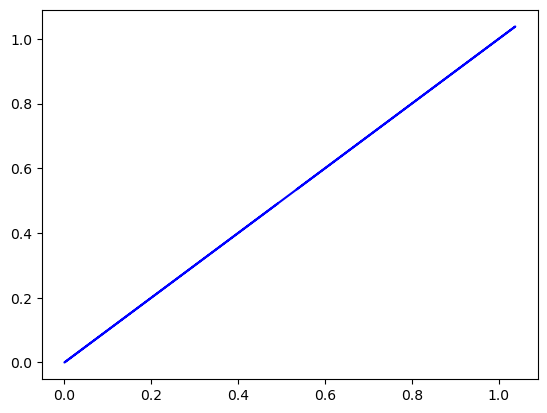

In [30]:
import MDAnalysis
from MDAnalysis.analysis.lineardensity import LinearDensity
import numpy as np
from itertools import count
import matplotlib.pyplot as plt
dcddir="/home/arjun/Documents/TUTORIALS_LAMMPS/ionic_liquuid/binary_mixtures/IL_NEMD_DT/IL_models/EMIM/emim-bf4-tfsi_airebo/uncharged_system/DCD/"
def density(psf, dcd, segid):
    u = MDAnalysis.Universe(psf, dcd)
    mol = u.select_atoms(segid)
    ldens = LinearDensity(mol, grouping ='atoms', binsize=0.5)
    ldens.run(start=0,stop=1000)
    D = ldens.results
    # x = np.linspace(1,np.size(D['x']['pos']),np.size(D['x']['pos']))
    # y = np.linspace(1,np.size(D['y']['pos']),np.size(D['y']['pos']))
    # z = np.linspace(1,np.size(D['z']['pos']),np.size(D['z']['pos']))
    z = D.z.pos
    print(z, D.z.mass_density)
    plt.plot(, D.z.mass_density,color='b')
    plt.show()
    np.savetxt("Den"+str(con)+str(segid)+'.dat',np.column_stack((z, D['z']['pos'])))
    
    return x, D['x']['pos'], y, D['y']['pos'], z, D['z']['pos']
for con in conrange:
    dcdfile=dcddir+'/bf_'+str(con)+'/prorun.4.350.dcd'
    psffile=dcddir+'/bf_'+str(con)+'/sys.psf'
    segids=['EIM','BF','NSC']
    for segid in segids:
        print(con,segid)
        seg='resname '+segid
        density(psffile,dcdfile,seg)
    

In [1]:
import matplotlib.pyplot as plt
from sympy.physics.vector import *
import math
import MDAnalysis
import numpy as np
import pandas as pd
from numpy.linalg import norm
from numpy import trapz

def plot_Pleg(psf, dcd):
    N = ReferenceFrame('N')
        
    fig = plt.figure(figsize=(10,4))
    
    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GL0")
    C1 = g.select_atoms("type C and resid 655").positions
    C2 = g.select_atoms("type C and resid 656").positions
    C3 = g.select_atoms("type C and resid 658").positions
    #print(C1,C2,C3)
    C1_2 = C1 - C2
    C3_2 = C3 - C2
    C = np.cross(C1_2,C3_2)
    C_Norm = C/norm(C)
    C_N = np.squeeze(np.asarray(C_Norm))
#     print(np.shape(C_N))
    v = u.select_atoms("resname EIM")
    b = u.select_atoms("resname BF")
    
    binWidth = 0.5
    nBin = int(40/binWidth)
    #Orient_Im = []
        
    grp1 = v.select_atoms("type NA1 NA2 CR1").groupby('resids')
    #print(grp1)
    
    g_p = g.principal_axes()
    
    t=[]
    binIndex = 0
    for ts in u.trajectory[4950:5000]:
        for k, d in grp1.items():
            z_cm = d.center_of_mass()
#             print(z_cm,d,ts)
            zp = z_cm[2]
            #print(zp)
            binIndex = int(zp/binWidth)
            CR = d.select_atoms("name CR1").positions
            NA1 = d.select_atoms("name NA1").positions
            NA2 = d.select_atoms("name NA2").positions
            V_1 = CR - NA1
#             print(np.shape(V_1))
            V_2 = CR - NA2
            V = np.cross(V_1,V_2)
            #print(C,V)
#             print(np.shape(V))
            V_Norm = V/(np.linalg.norm(V))  #unit vector
            gp_Norm = np.array([0,0,1])
#             print(np.shape(V_Norm))
#             print(np.shape(gp_Norm))
            cos_theta1 = (np.dot(V, gp_Norm))/(np.linalg.norm(V)*np.linalg.norm(gp_Norm))
#             print(type(cos_theta1))
            t.append([binIndex, cos_theta1])
#             print(t)
    cos = (sorted(t, key=lambda x:x[0]))    
#     print(cos)
    df = pd.DataFrame(cos, dtype=float)
    df.columns =['binIndex', 'Orient']
    df['P'] = df['Orient'].abs()
#     print(df)
    #gp = df.groupby('binIndex')['Orient'].sum()
    grouped_df = df.groupby("binIndex")
#     print(grouped_df)
    mean_df = grouped_df.mean()
    mean_df = mean_df.reset_index()
#     print(mean_df)
     
    mean_df['Orient'] = mean_df['P'].apply(lambda x: (3.0/2.0)*np.square(x)-(1.0/2.0))
#     print(mean_df)
    mean_df['binIndex'] = mean_df['binIndex'].apply(lambda x: x*binWidth+0.5*binWidth)
    #plt.scatter(mean_df["binIndex"], mean_df["Orient"], label='1')
#     print(mean_df)
    mean_df.plot(kind='line',x='binIndex',y='P', color='red')
    xvals=(mean_df['binIndex'])
    yval =  mean_df['Orient']
    print(yval)
    area = trapz(yval, dx=binWidth)
    print(area)
    plt.ylim(0,1)
    plt.legend()
    plt.title("orientation parameter@"+str(T)+'k,bf='+str(con))
    plt.savefig("str"+str(dT)+'.'+str(con)+'.png',dpi=600)
    plt.show()  

In [2]:
conrange= [0,100,200,300,400]
trange= [350]
dtrange = [60,80]
diranl="./bf4_"
for con in conrange:
    for dT in dtrange:
        irun=1
        print(diranl+str(con)+"/dt="+str(dT)+'/output/'+'sys.psf', diranl+str(con)+ "/dt="+str(dT)+'/output'+'/prorun.'+str(irun)+"."+str(T)+'.dcd')
        plot_Pleg(diranl+str(con)+"/dt="+str(dT)+'/output/'+'sys.psf', diranl+str(con)+"/dt="+str(dT)+'/output'+'/prorun.'+str(irun)+"."+str(T)+'.dcd')

NameError: name 'T' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sympy.physics.vector import *
import math
import MDAnalysis
import numpy as np
import pandas as pd
from numpy.linalg import norm
from numpy import trapz

def plot_Pleg(psf, dcd):
    N = ReferenceFrame('N')
        
    fig = plt.figure(figsize=(10,4))
    
    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GL0")
    C1 = g.select_atoms("type C and resid 655").positions
    C2 = g.select_atoms("type C and resid 656").positions
    C3 = g.select_atoms("type C and resid 658").positions
    print(C1,C2,C3)
    C1_2 = C1 - C2
    C3_2 = C3 - C2
    C = np.cross(C1_2,C3_2)
    print(C)
    C_Norm = C/norm(C)
    print(C_Norm)
    C_N = np.squeeze(np.asarray(C_Norm))
#     print(np.shape(C_N))
    v = u.select_atoms("resname EIM")
    b = u.select_atoms("resname BF")
    
    binWidth = 0.5
    nBin = int(40/binWidth)
    #Orient_Im = []
        
    grp1 = v.select_atoms("type NA1 NA2 CR1").groupby('resids')
    #print(grp1)
    
    g_p = g.principal_axes()
    
    t=[]
    binIndex = 0
    for ts in u.trajectory[2000:3000]:
        for k, d in grp1.items():
            z_cm = d.center_of_mass()
#             print(z_cm,d,ts)
            zp = z_cm[2]
            #print(zp)
            binIndex = int(zp/binWidth)
            CR = d.select_atoms("name CR1").positions
            NA1 = d.select_atoms("name NA1").positions
            NA2 = d.select_atoms("name NA2").positions
            V_1 = CR - NA1
#             print(np.shape(V_1))
            V_2 = CR - NA2
            V = np.cross(V_1,V_2)
#             print(np.shape(V))
            V_Norm = V/(np.linalg.norm(V))  #unit vector
            gp_Norm = np.array([0,0,1])
#             print(np.shape(V_Norm))
#             print(np.shape(gp_Norm))
            cos_theta1 = (np.dot(V, gp_Norm))/(np.linalg.norm(V)*np.linalg.norm(gp_Norm))
#             print(type(cos_theta1))
            t.append([binIndex, cos_theta1])
#             print(t)
    cos = (sorted(t, key=lambda x:x[0]))    
#     print(cos)
    df = pd.DataFrame(cos, dtype=float)
    df.columns =['binIndex', 'Orient']
    df['P'] = df['Orient'].abs()
#     print(df)
    #gp = df.groupby('binIndex')['Orient'].sum()
    grouped_df = df.groupby("binIndex")
#     print(grouped_df)
    mean_df = grouped_df.mean()
    mean_df = mean_df.reset_index()
#     print(mean_df)
     
    mean_df['Orient'] = mean_df['P'].apply(lambda x: (3.0/2.0)*np.square(x)-(1.0/2.0))
#     print(mean_df)
    mean_df['binIndex'] = mean_df['binIndex'].apply(lambda x: x*binWidth+0.5*binWidth)
    #plt.scatter(mean_df["binIndex"], mean_df["Orient"], label='1')
#     print(mean_df)
    mean_df.plot(kind='line',x='binIndex',y='P', color='red')
    xvals=(mean_df['binIndex'])
    yval =  mean_df['Orient']
    print(yval)
    area = trapz(yval, dx=binWidth)
    print(area)
    plt.ylim(0,1)
    plt.legend()
    plt.title("orientation parameter@"+str(T)+'k,bf='+str(con))
    plt.savefig("str"+str(dT)+'.'+str(con)+'.png',dpi=600)
    plt.show()